In [156]:
import pandas as pd
import networkx as nx
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

In [192]:
df = pd.read_excel('SignEpiPairs.xlsx')
df=df[df.pBon<0.05]

In [242]:
df

,SegN,VarPos,Perm,SubPos,SubPerm,p,logodds,X_1,X_2,X_3,...,GI,pBon,ReallyPositivePair,ReallyNegativePair,ScerPos_WithSign,ScerPos_PartnerSite,Xf_1,Xf_2,Xf_3,Xf_4
0,2,6,CS,8,IT,2.044425e-246,0.009042,85,1305,389,...,76,2.480092e-242,True,False,111,113,0.046372,0.711948,0.212220,0.029460
1,2,6,AC,8,IT,2.148366e-126,0.031833,94,570,373,...,74,2.606182e-122,True,False,111,113,0.084761,0.513977,0.336339,0.064923
2,2,8,TV,28,FV,1.422274e-115,0.003212,68,2451,95,...,80,1.725361e-111,True,False,113,133,0.025905,0.933714,0.036190,0.004190
3,2,2,DS,4,AP,4.495634e-108,0.058976,130,622,404,...,68,5.453653e-104,True,False,107,109,0.102362,0.489764,0.318110,0.089764
4,2,6,CS,8,TV,3.706988e-104,28.560606,1305,165,54,...,76,4.496947e-100,True,False,111,113,0.759162,0.095986,0.031414,0.113438
5,2,8,TV,28,FI,5.222215e-102,0.007270,68,2166,95,...,80,6.335069e-98,True,False,113,133,0.028924,0.921310,0.040408,0.009358
6,2,8,IT,28,FV,5.223764e-97,0.004709,80,2456,83,...,78,6.336948e-93,True,False,113,133,0.030407,0.933485,0.031547,0.004561
7,2,26,PT,28,IV,1.438273e-87,0.078987,164,430,507,...,91,1.744769e-83,True,False,131,133,0.135987,0.356551,0.420398,0.087065
8,2,8,IT,28,FI,4.081313e-85,0.009876,80,2147,83,...,78,4.951041e-81,True,False,113,133,0.034305,0.920669,0.035592,0.009434
9,2,6,AC,8,TV,1.919521e-82,19.316667,570,100,72,...,74,2.328571e-78,True,False,111,113,0.578093,0.101420,0.073022,0.247465


In [235]:
graph = df[df.SegN==12]
graph = graph.reset_index(drop=True)

In [236]:
H = nx.Graph()

for i in range(len(graph)):
    node1 = str(graph['VarPos'].ix[i]) + str(graph['Perm'].ix[i])
    node2 = str(graph['SubPos'].ix[i]) + str(graph['SubPerm'].ix[i]) 
    if node1 not in H.nodes():
        H.add_node(node1)
    if node2 not in H.nodes():
        H.add_node(node2)
    H.add_edge(node1, node2, {'color':'gray','thickness':2})

In [237]:
max(nx.greedy_color(H).values())+1

4

s1 -- 5
s2 -- 5
s3 -- 5
s4 -- 3
s5 -- 7
s6 -- 5
s8 -- 4
s9 -- 2
s11 -- 4
s12 -- 4

In [238]:
x = [5,5,5,3,7,5,3,2,4,4]
y = [len(df[df.SegN==i]) for i in [1,2,3,4,5,6,8,9,11,12]]

In [241]:
y

[218, 201, 172, 17, 92, 105, 48, 3, 62, 50]

In [239]:
_,_,R,_,_=stats.linregress(x,y)
R

0.6279271738085509

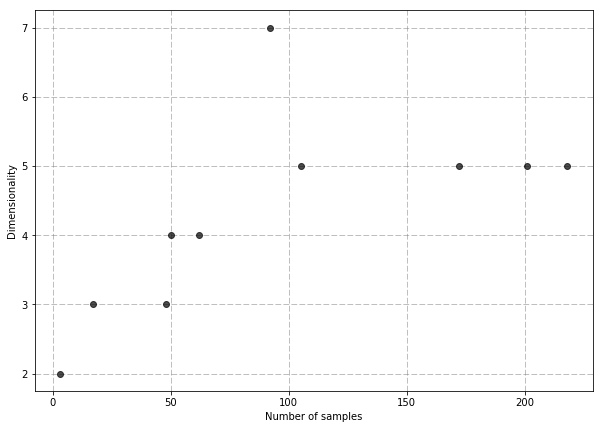

In [240]:
plt.figure(figsize=[10,7])
plt.plot(y,x,'ok', alpha = 0.7)
plt.xlabel('Number of samples')
plt.ylabel('Dimensionality')
plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray');

In [163]:
y

[468, 287, 275, 41, 135, 169, 103, 9, 3, 133, 135]